In [2]:
# Load all required libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd 

## Setting Pandas print option to print decimal values upto 4 places
np.set_printoptions(precision=4, linewidth=100)
# linewidth = The number of characters per line for the purpose of inserting line breaks 


In [14]:
data = pd.read_excel("Inventory.xlsx")
data = data.rename(columns={' Cost':'Cost'})

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Cost      36 non-null     float64
 1   Quantity  36 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 704.0 bytes


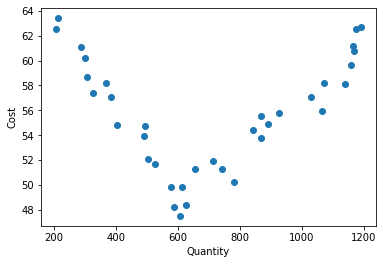

In [15]:
plt.scatter(data['Quantity'],data['Cost'])
plt.xlabel("Quantity")
plt.ylabel("Cost")
plt.show()

In [17]:
import statsmodels.api as sm

# Seperate the independent variable
X = sm.add_constant( data['Quantity'] )
X.head(5)

Y = data['Cost']


In [18]:
from sklearn.model_selection import train_test_split
# Splitting the dataset into Train and Test.

# 80:20 - Train:Test
train_X, test_X, train_y, test_y = train_test_split( X ,Y,train_size = 0.8,random_state = 100 )


In [22]:
# Model Fit
inventory_lm = sm.OLS( train_y, train_X ).fit()

# Estimated Parameter Results
print( inventory_lm.params )



const       55.651110
Quantity     0.000612
dtype: float64


In [23]:
# Model Diagostics
print(inventory_lm.summary())


                            OLS Regression Results                            
Dep. Variable:                   Cost   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.036
Method:                 Least Squares   F-statistic:                   0.05072
Date:                Wed, 29 Sep 2021   Prob (F-statistic):              0.824
Time:                        11:16:13   Log-Likelihood:                -81.644
No. Observations:                  28   AIC:                             167.3
Df Residuals:                      26   BIC:                             170.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.6511      1.990     27.962      0.0

<Figure size 576x432 with 0 Axes>

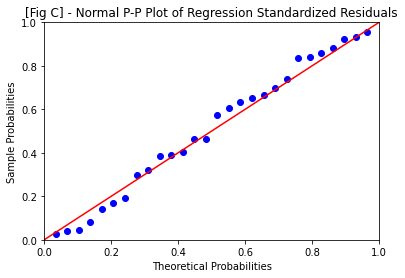

In [24]:
rue_resid = inventory_lm.resid
probplot = sm.ProbPlot( rue_resid, fit = True )
plt.figure( figsize = (8, 6) )
probplot.ppplot( line='45' )
plt.title( "[Fig C] - Normal P-P Plot of Regression Standardized Residuals" )
plt.show()

In [29]:
# Check the z-score for outlier analysis
from scipy.stats import zscore
data['z_score_cost']=zscore(data.Cost)

data[ (data.z_score_cost > 3.0) | (data.z_score_cost < -3.0) ]


,Cost,Quantity,z_score_cost


In [30]:
pred_y = inventory_lm.predict( test_X )
# Prediction on Validation set


In [31]:
from sklearn.metrics import r2_score, mean_squared_error
np.abs(r2_score(test_y, pred_y))


0.11713371287241503

In [32]:
import numpy
np.sqrt(mean_squared_error(test_y, pred_y))


4.554073712565091

In [35]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
# Predict the y values
pred_y = inventory_lm.predict( test_X )
# Predict the low and high interval values for y
_, pred_y_low, pred_y_high = wls_prediction_std( inventory_lm,
test_X,
alpha = 0.1) #90 % confidence interval
# Store all the values in a dataframe
pred_y_df = pd.DataFrame( { 'Quantity': test_X['Quantity'],
'pred_y': pred_y,
'pred_y_left': pred_y_low,
'pred_y_right': pred_y_high } )

pred_y_df


,Quantity,pred_y,pred_y_left,pred_y_right
0,844,56.167561,48.073222,64.261900
19,1174,56.369491,47.973230,64.765752
32,741,56.104535,48.047112,64.161957
35,870,56.183471,48.075397,64.291545
7,577,56.004182,47.947321,64.061042
12,1160,56.360924,47.982919,64.738929
29,780,56.128399,48.060300,64.196499
33,712,56.086789,48.034685,64.138894


# Part D

In [ ]:
# Task 1

# Import regex library
import re

# Open both files
file1 = open("script01.txt","r") #open script01.txt and save into file1
file2 = open("script02.txt", "r") #open script02.txt and save into file2

script1 = file1.read() #read in file1 into script1
script2 = file2.read() #read in file2 into script2

script = script1 + script2 #combine script1 and script2

# Step 2: Create list and dictionary
atoz = "abcdefghijklmnopqrstuvwxyz" #create a list of the alphabet

outcome = {} #Create empty dictionary

# Step 3: Create your own function 
for character in script: 
    ch = character.lower() #make all characters lowercase
    if ch in atoz: #check to see if the character is in the alphabet
        if ch not in outcome: #check to see if character is not already saved in dictionary
            outcome[ch] = 1 #Save character in dictionary and set value to 1
        else: #Character already saved in dictionary
            outcome[ch] += 1 #Add 1 to the value

# Sort dictionary from highest to lowest value
outcome_sort = sorted(outcome.items(), reverse = True, key=lambda x: x[1])

# Display the sorted output 
outcome_sort

# Write the output to text file called parta
with open('parta.txt','w') as f:
    print(outcome_sort,file=f)


In [3]:
# Task 2

# Import regex library
import re

file1 = open("script01.txt","r") #open script01.txt and save into file1
file2 = open("script02.txt", "r") #open script02.txt and save into file2

script1 = file1.read() #read in file1 into script1
script2 = file2.read() #read in file2 into script2

# Combine script1 and script2
script = script1 + script2 

# Convert all text to lower
script = script.lower()

# Substitute all characters except alphabets and spaces by an empty space 
script = re.sub('[^a-z ]+', ' ', script)

# Split the string into an array containing individual words
words = script.split()

# Create empty dictionary
outcome2 = {} 

# For loop to count the occurence of each word
for word in words: 
  if word not in outcome2: # If word is not in outcome
    outcome2[word] = 1 # Add the word and set index to 1
  else:
    outcome2[word] += 1 # Otherwise increase the index by 1

# Sort the dict by the number of occurences of each word
outcome2_sort = sorted(outcome2.items(), reverse = True, key=lambda x: x[1])

# Display the top 10 most frequently occuring words
list(outcome2_sort)[:10]

# Write the output to text file called partb
with open('partb.txt','w') as f:
    print(outcome2_sort,file=f)


In [1]:

# Get relevant libraries 
import re
import pandas as pd

# Open script01.txt and save into file1
file1 = open("script01.txt","r") 

# Open script02.txt and save into file1
file2 = open("script02.txt","r")

# Read in file1 into script1
script1 = file1.read() 

# Read in file2 into script2
script2 = file2.read()

# Load the data and convert the stop words into a list
data = pd.read_csv('stopwords.csv')
stop_words = data['above'].tolist()

# Convert script1 to lowercase and substitute all characters except alphabets and spaces by an empty space 
script1 = script1.lower()
script1 = re.sub('[^a-z ]+', ' ', script1)

# Split script1 into a list of words
script1 = script1.split()

# Convert script2 to lowercase and substitute all characters except alphabets and spaces by an empty space 
script2 = script2.lower()
script2 = re.sub('[^a-z ]+', ' ', script2)

# Split script2 into a list of words
script2 = script2.split()

# Create empty list to hold all the filtered words from script1
final_words1 = []

# Check all words in script1
for word in script1:
    if word not in stop_words: # If word is not in stop words
        if len(word) >= 2: # If the word is not a singleton
            final_words1.append(word)  # Add the word to list holding the filtered words from script1

# Create empty list to hold all the filtered words from script2
final_words2 = []

# Check all words in script1
for word in script2:
    if word not in stop_words: # If word is not in stop words
        if len(word) >= 2: # If the word is not a singleton
            final_words2.append(word)  # Add the word to list holding the filtered words from script2               

outcome_script1 = {} # Create empty dictionary to hold word count

# For all filtered words from script1
for word in final_words1: 
    
  if word not in outcome_script1: # Check to see if word is not already saved in dictionary
    outcome_script1[word] = 1 # Save word in dictionary and set value to 1
  else:  # Word already saved in dictionary
    outcome_script1[word] += 1 # Increase the count occurrence of the word

# Sort dictionary from highest to lowest value
outcome_script1 = sorted(outcome_script1.items(), reverse = True, key=lambda x: x[1]) 

# Grab the top 10 values which represent the 10 most occurring words and their counts
top_10 = (outcome_script1)[:10] 

# Empty list to store the top 10 words
top_10_words = []

# Grab the 10 most occurring words from the list, which is the first part of a tuple
for word in top_10:
    top_10_words.append(word[0])

# Empty dict to store counts of occurring in script2
script2_count = {}

# Check all filtered words in script2
for word in final_words2:
    if word in top_10_words: # If the word exists in the list containing top 10 words from script1
        if word not in script2_count: # Check to see if word already saved in the dict
            script2_count[word] = 1 # Save word in dict and set value to 1
        else: # Word already saved in dict
            script2_count[word] += 1 # Increase the count occurrence of the word

# Check all filtered words in script2
for word in top_10_words:
    if word not in script2_count: # If word did not appear in top 10 list
        script2_count[word] = 0 # Set the count of that word to 0

# Sory both lists containing the words and their occurrence count alphabetically
count = sorted(script2_count.items(), reverse = False, key=lambda x: x[0])
top_10 = sorted(top_10, reverse = False, key=lambda x: x[0])

# Convert the lists to dataframes
df1 = pd.DataFrame(top_10, columns =['Word', 'Script1_count'])
df2 = pd.DataFrame(count, columns =['Word', 'Script2_count'])

# Merge the 2 dataframes to get the word and thier counts in both scripts
data = df1.merge(df2)

# Print the resulting dataframe
data

# Write the output to text file called partc
with open('partc.txt','w') as f:
    print(data,file=f)